In [64]:
import numpy as np
import matplotlib.pyplot as plt
from univariate import *

In [65]:
x,y = load_data()
x_norm = z_score_normalized_features(x)
y_norm = z_score_normalized_features(y)

initial_w = 0.
initial_b = 0.

w,b,w_history,cost_history = calculate_gradient_descent(x_norm,y_norm,initial_w,initial_b,alpha=0.01,iterations=300)
print(f"Calculated w : {w} , b : {b}")

predicted_y = compute_model_output(x_norm,w,b)
denormalized_predicted_y = z_score_denormalized_features(y,predicted_y)



Iterations : 0 Cost : 4.90e-01
Iterations : 30 Cost : 2.78e-01
Iterations : 60 Cost : 1.62e-01
Iterations : 90 Cost : 9.83e-02
Iterations : 120 Cost : 6.36e-02
Iterations : 150 Cost : 4.45e-02
Iterations : 180 Cost : 3.41e-02
Iterations : 210 Cost : 2.84e-02
Iterations : 240 Cost : 2.53e-02
Iterations : 270 Cost : 2.36e-02
Iterations : 300 Cost : 2.27e-02
Calculated w : 0.9302677749003291 , b : 3.7562545666484474e-17


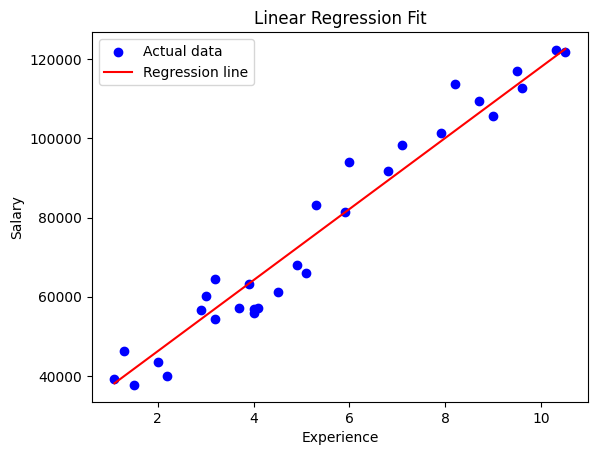

In [66]:
plt.scatter(x, y, color='blue', label='Actual data')
plt.plot(x, denormalized_predicted_y, color='red', label='Regression line')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

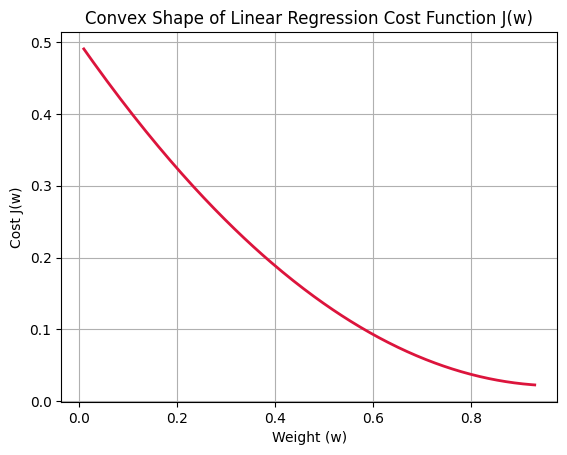

In [67]:
# plt.figure(figsize=(8,5))
plt.plot(w_history, cost_history, color='crimson', linewidth=2)
plt.title("Convex Shape of Linear Regression Cost Function J(w)")
plt.xlabel("Weight (w)")
plt.ylabel("Cost J(w)")
plt.grid(True)
plt.show()

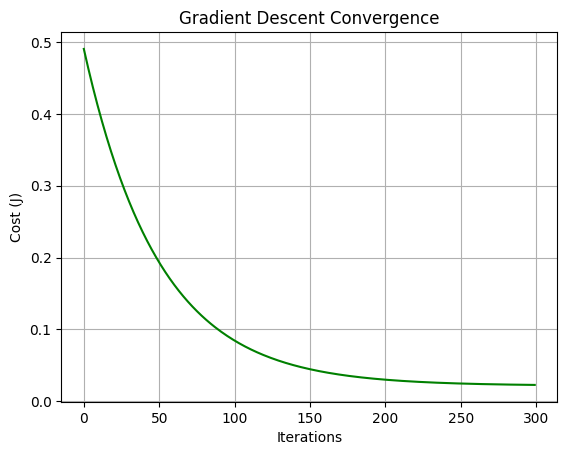

In [68]:
plt.plot(range(len(cost_history)), cost_history, color='green')
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Gradient Descent Convergence")
plt.grid(True)
plt.show()


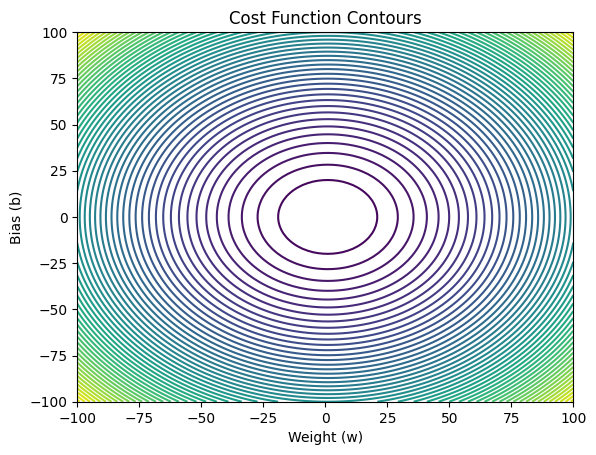

In [69]:
w_values = np.linspace(-100, 100, 100)
b_values = np.linspace(-100, 100, 100)
J_vals = np.zeros((len(w_values), len(b_values)))

for i in range(len(w_values)):
    for j in range(len(b_values)):
        J_vals[i, j] = calculate_cost(x_norm, y_norm, w_values[i], b_values[j])

W, B = np.meshgrid(w_values, b_values)
plt.contour(W, B, J_vals.T, levels=50, cmap='viridis')
plt.xlabel('Weight (w)')
plt.ylabel('Bias (b)')
plt.title('Cost Function Contours')
plt.show()



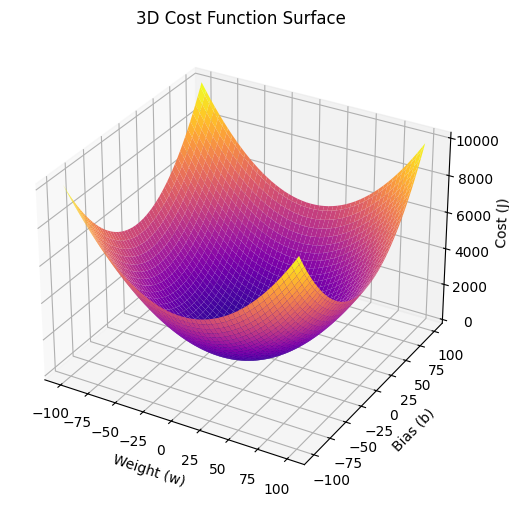

In [70]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W, B, J_vals.T, cmap='plasma')
ax.set_xlabel('Weight (w)')
ax.set_ylabel('Bias (b)')
ax.set_zlabel('Cost (J)')
ax.set_title('3D Cost Function Surface')
plt.show()


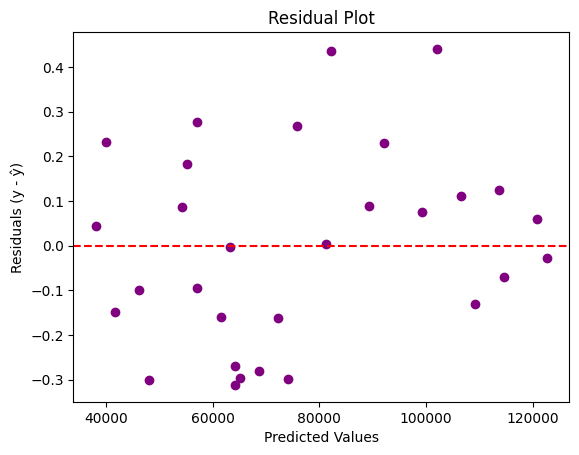

In [71]:
residuals = y_norm - predict(x_norm, w, b)
plt.scatter(denormalized_predicted_y, residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals (y - ŷ)")
plt.title("Residual Plot")
plt.show()


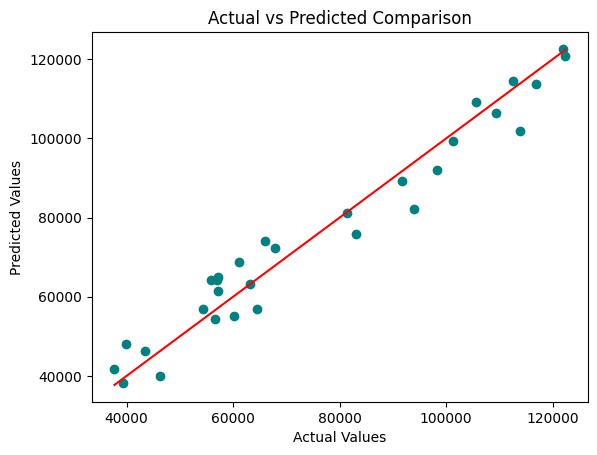

In [72]:
# y_pred = predict(x_norm, w, b)
plt.scatter(y, denormalized_predicted_y, color='teal')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red')  # perfect line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Comparison")
plt.show()

